### Overview

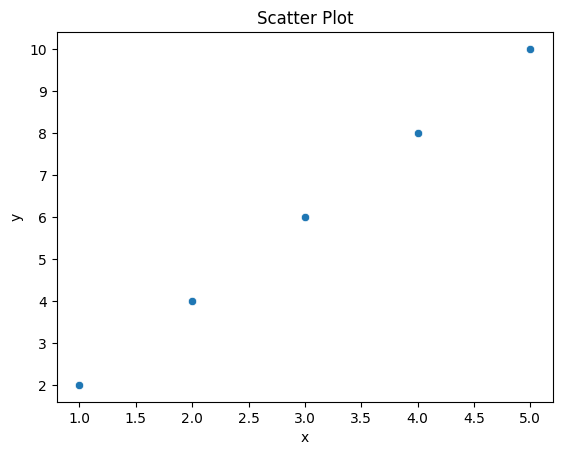

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
# Sample dataset
data = pd.DataFrame({'x': [1,2,3,4,5], 'y': [2,4,6,8,10]})
# Create scatter plot
sns.scatterplot(x='x', y='y', data=data)
plt.title("Scatter Plot")
plt.show()


In [3]:
import numpy as np
# Example: Create a NumPy array and perform basic operations
arr = np.array([1, 2, 3, 4, 5])
print(np.mean(arr)) # Mean of the array

3.0


In [ ]:
import pandas as pd
# sLoading a CSV file into a DataFrame
df = pd.read_csv('data.csv')
# Display first 5 rows
print(df.head())

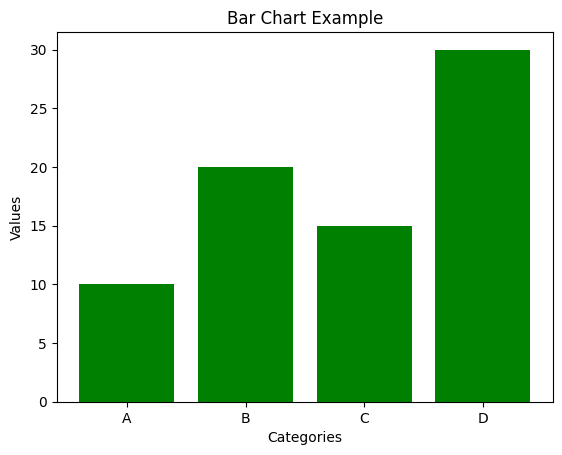

In [4]:
import matplotlib.pyplot as plt
categories = ["A", "B", "C", "D"]
values = [10, 20, 15, 30]
plt.bar(categories, values, color='green')
plt.xlabel("Categories")
plt.ylabel("Values")
plt.title("Bar Chart Example")
plt.show()

In [ ]:
import pandas as pd
df = pd.read_csv("data.csv") # Reading a CSV file
df.to_csv("output.csv", index=False) # Writing to a CSV file
print(df.head()) # Display first few rows

### Handling Missing Values

In [ ]:
# Check for missing values
print(df.isnull().sum())
# Drop missing values
df_cleaned = df.dropna()
print("Dataset after dropping missing values:", df_cleaned.shape)
# Handle missing values
df['age'] = df['age'].fillna(df['age'].mean()) # Fill age with mean
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0]) # Fill
embarked with mode
# Convert deck to string and replace NaN
df['deck'] = df['deck'].astype(str).fillna('Unknown')
# Drop remaining NaN values if needed
df = df.dropna()
print(df.isnull().sum()) # Confirm no missing values

### Encoding Categorical Data

3.3.1 Label Encoding (For Binary Categories)

In [ ]:
#Converts categories into numbers (e.g., male → 0, female → 1).
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender']) # 0 for male, 1 for female
print(df['gender'].head())

3.3.2 One-Hot Encoding (For Multi-Class Categories)

In [ ]:
#Creates separate binary columns for each category.
encoded_df = pd.get_dummies(df, columns=['embarked'], drop_first=True)
print(df.head())

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np
data = np.array([['Red'], ['Blue'], ['Green'], ['Red']])
encoder = OneHotEncoder(sparse_output=False)  # sparse=True gives sparse matrix
encoded = encoder.fit_transform(data)
print(encoded)

### Train-Test Split

● Underfitting: Model is too simple, performs poorly on training and test data.

● Overfitting: Model memorizes training data but performs poorly on unseen data.

● Solution: Use train-test split and cross-validation to check generalization.

1. 80-20 Split (Common Practice)

○ 80% Training, 20% Testing

○ Used for general ML problems.
2. 70-30 Split

○ More test data, useful when we need better validation.
3. 60-20-20 Split (Train, Validation, Test)

○ 60% Training, 20% Validation, 20% Testing

○ Used for hyperparameter tuning to avoid overfitting.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import numpy as np

# Generate dummy dataset
X = np.random.rand(100, 5) # 100 samples, 5 features
y = np.random.randint(0, 2, 100) # Binary target variable (0 or 1)

# Splitting the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Naïve Bayes model
model = GaussianNB()

# Train the model on training data
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

### Cross Validation

4.1 K-Fold Cross Validation

In [ ]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import seaborn as sns

# Load dataset
df = sns.load_dataset("titanic")

# Select features and target, handling missing values
X = df[['age', 'fare']].fillna(df[['age', 'fare']].mean())
y = df['survived']

# Convert to DataFrame to use .iloc[]
X = pd.DataFrame(X)
y = pd.Series(y)

# Define K-Fold (5 splits)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize model
model = LogisticRegression()

# Store accuracy scores
accuracy_scores = []

# Perform K-Fold CV
for train_index, test_index in kf.split(X):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index] # Now X is a DataFrame
  y_train, y_test = y.iloc[train_index], y.iloc[test_index] # Now y is a Series

  # Train model
  model.fit(X_train, y_train)

  # Predict and evaluate
  y_pred = model.predict(X_test)
  acc = accuracy_score(y_test, y_pred)
  accuracy_scores.append(acc)

# Print average accuracy
print("K-Fold CV Average Accuracy:", np.mean(accuracy_scores))

4.2 Leave-One-Out Cross Validation (LOOCV)

In [ ]:
from sklearn.model_selection import LeaveOneOut

# Initialize LOOCV
loo = LeaveOneOut()

# Store accuracy scores
loo_scores = []

# Perform LOOCV
for train_index, test_index in loo.split(X):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

  # Train model
  model.fit(X_train, y_train)

  # Predict and evaluate
  y_pred = model.predict(X_test)
  loo_scores.append(accuracy_score(y_test, y_pred))

# Print average accuracy
print("LOOCV Average Accuracy:", np.mean(loo_scores))

### 5. Performance Evaluation Metrics

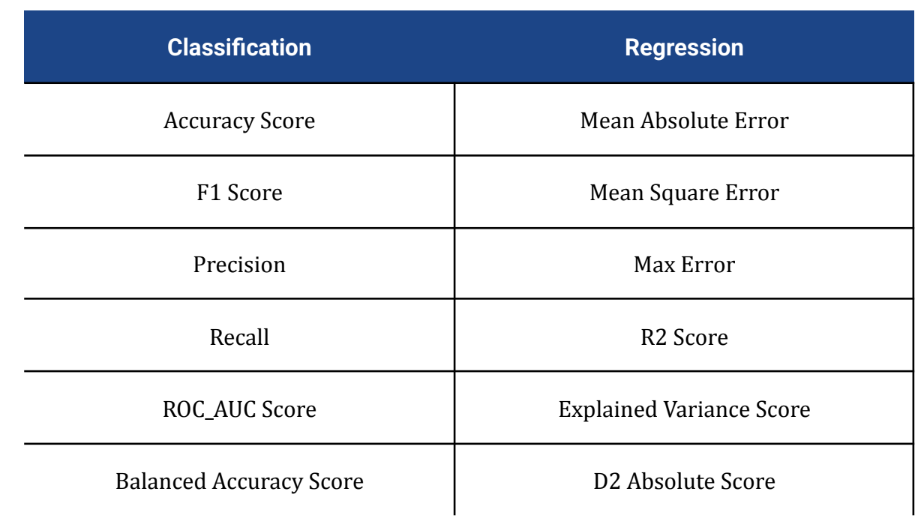




 📊 What is the ROC Curve?

**ROC** stands for **Receiver Operating Characteristic**. It is a **graphical representation** used to evaluate the performance of **binary classification models**.

 📈 What does it plot?

* **Y-axis (TPR)**: **True Positive Rate**, also called **Recall**

  $$
  \text{TPR} = \frac{\text{True Positives}}{\text{True Positives + False Negatives}}
  $$

  It shows how many actual positives your model correctly predicted.

* **X-axis (FPR)**: **False Positive Rate**

  $$
  \text{FPR} = \frac{\text{False Positives}}{\text{False Positives + True Negatives}}
  $$

  It shows how many actual negatives your model wrongly predicted as positives.

---

 🎯 Goal of ROC:

* A **perfect classifier** has:

  * **TPR = 1** (all positives correctly predicted)
  * **FPR = 0** (no negatives wrongly predicted)
  * Appears at the **top-left corner** of the ROC plot.
* A **random classifier** plots a **diagonal line** (TPR = FPR at all thresholds), with an **AUC = 0.5**.

---

 ✅ What is AUC?

**AUC** = **Area Under the Curve**
It summarizes the entire ROC curve into a single value:

* **AUC = 1** → Perfect model
* **AUC = 0.5** → Random guessing
* **AUC < 0.5** → Worse than random (model is likely inverted)

---

 📧 Example (Spam Classifier):

Imagine a model that predicts whether an email is **spam (1)** or **not spam (0)**:

* At low thresholds, the model labels most emails as spam → **high TPR**, but also **high FPR**
* As the threshold increases, fewer emails are labeled spam → **TPR drops**, **FPR also drops**
* Plotting TPR vs FPR across all thresholds gives the **ROC curve**

---

 🧠 Why is ROC useful?

* Helps you **choose the best threshold** based on your needs (e.g., do you want more TPR even if FPR increases?)
* Allows you to **compare different models**
* Works well even if your dataset is **imbalanced**

---

Would you like a diagram or plot of a sample ROC curve to visualize this better?


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assuming the model has been trained and 'PredictionDT' holds class predictions
# To compute ROC, we need the probability estimates, not just the predicted class.
# For binary classification, use the probabilities of the positive class.

# Get probabilities for the positive class
probabilities = DT.predict_proba(x_test)[:, 1] # Get the probability for class '1'

# Calculate ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, probabilities)

# Calculate ROC_AUC Score
roc_auc = roc_auc_score(y_test, probabilities)

# Plot ROC curve with shaded area under the curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.fill_between(fpr, tpr, color='skyblue', alpha=0.4)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC Area')
plt.legend(loc='lower right')
plt.show()

Evaluation metrics

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay,
    accuracy_score, precision_score, recall_score, r2_score
)
import seaborn as sns
import matplotlib.pyplot as plt

# Load Titanic dataset
df = sns.load_dataset("titanic")

# Prepare data
df = df[['age', 'fare', 'survived']].dropna()  # Drop rows with missing values
X = df[['age', 'fare']]
y = df['survived']

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
model = LogisticRegression()
model.fit(x_train, y_train)

# Predictions
y_pred = model.predict(x_test)

# Evaluation Metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
r2 = r2_score(y_test, y_pred)  # Note: not ideal for classification, shown just for contrast

print("Accuracy     :", acc)
print("Precision    :", prec)
print("Recall       :", rec)
print("R2 Score     :", r2)  # Mainly used in regression

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

# Plot
plt.figure(figsize=(6, 4))
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.show()



### SVM

In [ ]:
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

y = (y == 0).astype(int) # Convert to binary classification problem

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train SVM model with RBF kernel
svm = SVC(kernel='rbf', C=1, gamma='scale')
svm.fit(X_train, y_train)

# Make predictions
y_pred = svm.predict(X_test)

# Evaluate the model
print("SVM Accuracy:", accuracy_score(y_test, y_pred))

### Linear Regression

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create and train the Linear Regression model
LR = LinearRegression()
ModelLR = LR.fit(x_train, y_train)

# Predict on the test data
PredictionLR = ModelLR.predict(x_test)
# Print the predictions
print("Predictions:", PredictionLR)

1. Coefficient of Determination or R-Squared (R2)
2. Root Mean Squared Error (RSME)

In [ ]:
from sklearn.metrics import r2_score
print('===================LR Testing Accuracy================')
teachLR = r2_score(y_test, PredictionLR)
testingAccLR = teachLR * 100
print(testingAccLR)

### Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the DecisionTreeClassifier
DT = DecisionTreeClassifier()

# Train the model
ModelDT = DT.fit(x_train, y_train)

# Model Testing (Prediction)
PredictionDT = DT.predict(x_test)
print("Predictions:", PredictionDT)

# Model Training Accuracy
print('====================DT Training Accuracy===============')
tracDT = DT.score(x_train, y_train) # The score method gives accuracy directly
TrainingAccDT = tracDT * 100
print(f"Training Accuracy: {TrainingAccDT:.2f}%")

# Model Testing Accuracy
print('=====================DT Testing Accuracy=================')
teacDT = accuracy_score(y_test, PredictionDT)
testingAccDT = teacDT * 100
print(f"Testing Accuracy: {testingAccDT:.2f}%")